In [1]:
import pandas as pd
import numpy as np
from roughviz.charts import Bar, Barh
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import seaborn as sns
import os
import tqdm
import imageio

from PIL import Image
from matplotlib import font_manager
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, OffsetBox

In [2]:
road = pd.read_csv("Road Safety Study on the West Side of Salisbury_December 8, 2023_15.50.csv")
#road.head(), raw data carries sensitive information, when cannot be outputted

In [3]:
#filtered out sensitive data columns
road.drop([1], inplace=True)
road.drop(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'ResponseId', 'DistributionChannel'], axis=1, inplace=True)
road.fillna('NO INPUT', inplace=True)
road.reset_index(drop=True, inplace=True)
print("Total number of respondents in survey from semi-raw data: " + str(road.index.size - 1))
road.head()

Total number of respondents in survey from semi-raw data: 274


,Finished,RecordedDate,UserLanguage,1.,2.,2._13_TEXT,3._1,4.,5.,5b.,6.,6b.,7.,7._12_TEXT,8.,8._11_TEXT,9.
0,Finished,Recorded Date,User Language,Are you 18 years or older?,Where is your place of residence? - Selected C...,Where is your place of residence? - Other [ple...,How often do you visit the West side of Salisb...,"Generally, what is your most common form of pe...",Do you believe the roads on the West side of S...,Please explain further about safety for walkin...,Do you believe the roads on the West side of S...,Please explain further about safety for biking...,Which of the following would you like to see a...,Which of the following would you like to see a...,Where would you like to see a bus stop added o...,Where would you like to see a bus stop added o...,Do you have any other comments to share about ...
1,True,2023-08-28 09:36:50,EN,Yes,"Salisbury, Maryland",NO INPUT,3,"Personal vehicle,Walk / Jog","No, I believe safety improvements are needed f...",NO INPUT,"No, I believe safety improvements are needed f...",NO INPUT,"Speed humps,Bike lanes,Sidewalks,Streetlights",NO INPUT,Lake Street (Village of Hope and Homes on John...,NO INPUT,NO INPUT
2,True,2023-08-28 17:20:30,EN,Yes,Other [please type City/State where you live],"Fruitland, MD",2,Personal vehicle,"No, I believe safety improvements are needed f...",Many roads do not have sidewalks,"Yes, I believe the roads are safe for biking",NO INPUT,"Sidewalks,Lowering the speed limit,Streetlights",NO INPUT,I don’t think any bus stops are needed,NO INPUT,Please get input from the community that lives...
3,True,2023-08-28 17:43:34,EN,Yes,NO INPUT,NO INPUT,4,Personal vehicle,"No, I believe safety improvements are needed f...",NO INPUT,"No, I believe safety improvements are needed f...",NO INPUT,Other: [please list any other road safety ideas],Why are you asking opinion about this? Speed l...,"Cypress Road (Sav A Lot parking lot),Lake Stre...",Pemberton Drive. Transit isn’t just for disadv...,NO INPUT
4,True,2023-08-28 18:31:42,EN,Yes,NO INPUT,NO INPUT,4,Personal vehicle,"Yes, I believe the roads are safe for walking",Where there are sidewalks,"Yes, I believe the roads are safe for biking",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT


In [4]:
unfinished_data = road[road['Finished'] == "False"]
print("Number of unfinished data: " + str(unfinished_data.index.size))
unfinished_data.head()

Number of unfinished data: 46


,Finished,RecordedDate,UserLanguage,1.,2.,2._13_TEXT,3._1,4.,5.,5b.,6.,6b.,7.,7._12_TEXT,8.,8._11_TEXT,9.
10,False,2023-09-04 21:31:51,EN,Yes,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,What does the data show? I think the roads are...,"Yes, I believe the roads are safe for biking",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
12,False,2023-09-06 11:22:06,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
42,False,2023-09-20 13:37:50,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
43,False,2023-09-20 18:43:36,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,Personal vehicle,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
44,False,2023-09-20 18:50:38,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT


In [5]:
useless_data = road[(road['2.'] == "NO INPUT") &
                    (road['2._13_TEXT'] == "NO INPUT") & 
                    (road['3._1'] == "NO INPUT") & 
                    (road['4.'] == "NO INPUT") & 
                    (road['5.'] == "NO INPUT") & 
                    (road['5b.'] == "NO INPUT") &
                    (road['6.'] == "NO INPUT") &
                    (road['6b.'] == "NO INPUT") &
                    (road['7.'] == "NO INPUT") &
                    (road['7._12_TEXT'] == "NO INPUT") &
                    (road['8._11_TEXT'] == "NO INPUT") &
                    (road['9.'] == "NO INPUT")].index
road.drop(useless_data, inplace=True)
road.reset_index(drop=True, inplace=True)
print("Total number of respondents in survey after cleanup: " + str(road.index.size - 1))
road.head()

Total number of respondents in survey after cleanup: 268


,Finished,RecordedDate,UserLanguage,1.,2.,2._13_TEXT,3._1,4.,5.,5b.,6.,6b.,7.,7._12_TEXT,8.,8._11_TEXT,9.
0,Finished,Recorded Date,User Language,Are you 18 years or older?,Where is your place of residence? - Selected C...,Where is your place of residence? - Other [ple...,How often do you visit the West side of Salisb...,"Generally, what is your most common form of pe...",Do you believe the roads on the West side of S...,Please explain further about safety for walkin...,Do you believe the roads on the West side of S...,Please explain further about safety for biking...,Which of the following would you like to see a...,Which of the following would you like to see a...,Where would you like to see a bus stop added o...,Where would you like to see a bus stop added o...,Do you have any other comments to share about ...
1,True,2023-08-28 09:36:50,EN,Yes,"Salisbury, Maryland",NO INPUT,3,"Personal vehicle,Walk / Jog","No, I believe safety improvements are needed f...",NO INPUT,"No, I believe safety improvements are needed f...",NO INPUT,"Speed humps,Bike lanes,Sidewalks,Streetlights",NO INPUT,Lake Street (Village of Hope and Homes on John...,NO INPUT,NO INPUT
2,True,2023-08-28 17:20:30,EN,Yes,Other [please type City/State where you live],"Fruitland, MD",2,Personal vehicle,"No, I believe safety improvements are needed f...",Many roads do not have sidewalks,"Yes, I believe the roads are safe for biking",NO INPUT,"Sidewalks,Lowering the speed limit,Streetlights",NO INPUT,I don’t think any bus stops are needed,NO INPUT,Please get input from the community that lives...
3,True,2023-08-28 17:43:34,EN,Yes,NO INPUT,NO INPUT,4,Personal vehicle,"No, I believe safety improvements are needed f...",NO INPUT,"No, I believe safety improvements are needed f...",NO INPUT,Other: [please list any other road safety ideas],Why are you asking opinion about this? Speed l...,"Cypress Road (Sav A Lot parking lot),Lake Stre...",Pemberton Drive. Transit isn’t just for disadv...,NO INPUT
4,True,2023-08-28 18:31:42,EN,Yes,NO INPUT,NO INPUT,4,Personal vehicle,"Yes, I believe the roads are safe for walking",Where there are sidewalks,"Yes, I believe the roads are safe for biking",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT


In [6]:
#printing the amount of partially finished data
unfinished_data = road[road['Finished'] == "False"]
print("Number of unfinished data: " + str(unfinished_data.index.size))
unfinished_data.head()

Number of unfinished data: 40


,Finished,RecordedDate,UserLanguage,1.,2.,2._13_TEXT,3._1,4.,5.,5b.,6.,6b.,7.,7._12_TEXT,8.,8._11_TEXT,9.
10,False,2023-09-04 21:31:51,EN,Yes,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,What does the data show? I think the roads are...,"Yes, I believe the roads are safe for biking",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
12,False,2023-09-06 11:22:06,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
42,False,2023-09-20 13:37:50,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
43,False,2023-09-20 18:43:36,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,Personal vehicle,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT
44,False,2023-09-20 18:50:38,EN,Yes,"Salisbury, Maryland",NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT,NO INPUT


In [7]:
languages = road['UserLanguage'].value_counts()
number_of_lang = pd.DataFrame(languages)
number_of_lang.reset_index(inplace=True)
number_of_lang.columns = ['UserLanuages', 'respondents']
number_of_lang.drop([3], inplace=True)
number_of_lang['UserLanuages'] = number_of_lang['UserLanuages'].replace({'EN': 'ENGLISH', 'ES-KR':'HAITIAN KREYOL', 'ES-ES': 'SPANISH'})
print("Number of total respondents: " + str(number_of_lang['respondents'].sum()))
number_of_lang

Number of total respondents: 268


,UserLanuages,respondents
0,ENGLISH,249
1,HAITIAN KREYOL,15
2,SPANISH,4


<Axes: title={'center': 'Languages of Survey Responses'}, ylabel='respondents'>

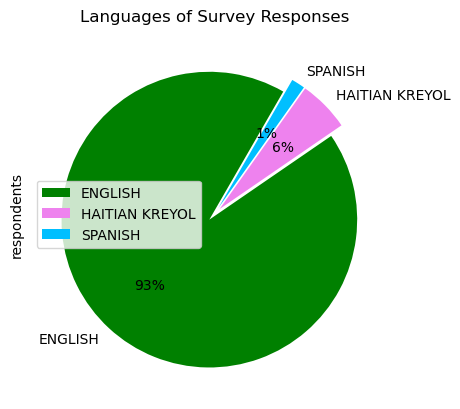

In [8]:
explode = (0.05, 0.05, 0.05) 
number_of_lang.groupby(['UserLanuages']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet', 'deepskyblue'],
                                title='Languages of Survey Responses', explode=explode, startangle=60)

In [9]:
filtered_responses = road[road['2.'] != 'NO INPUT']
residence = filtered_responses['2.'].value_counts()
number_of_residence = pd.DataFrame(residence)
number_of_residence.reset_index(inplace=True)
number_of_residence.columns = ['Question 2.', 'respondents']
number_of_residence.drop([2], inplace=True)
print("Number of total respondents: " + str(number_of_residence['respondents'].sum()))
number_of_residence

Number of total respondents: 240


,Question 2.,respondents
0,"Salisbury, Maryland",181
1,Other [please type City/State where you live],59


<Axes: title={'center': 'Place of Residence of Survey Responses'}, ylabel='respondents'>

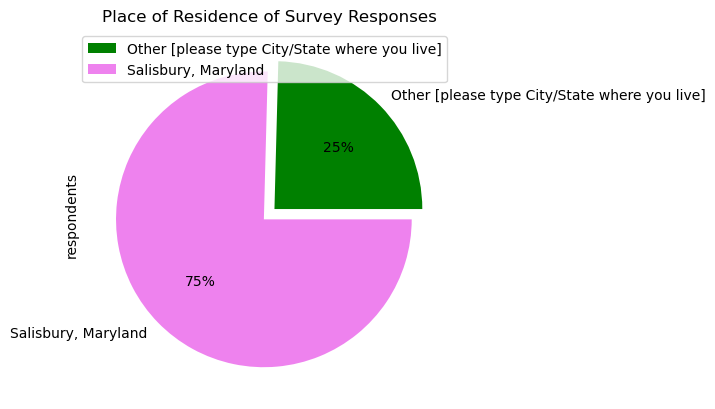

In [10]:
explode = (0.05, 0.05) 
number_of_residence.groupby(['Question 2.']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet'],
                                title='Place of Residence of Survey Responses', explode=explode)

In [11]:
filtered_responses = road[road['3._1'] != 'NO INPUT']
visits = filtered_responses['3._1'].value_counts(sort=True)
number_of_visits = pd.DataFrame(visits)
number_of_visits.reset_index(inplace=True)
number_of_visits.columns = ['Question 3.', 'respondents']
number_of_visits['Question 3.'] = number_of_visits['Question 3.'].replace({'0': 'Never', '1':'Rarely', '2': 'Sometimes', '3': 'Frequently', '4': 'All the Time'})
number_of_visits.drop([5], inplace=True)
print("Number of total respondents: " + str(number_of_visits['respondents'].sum()))
number_of_visits

Number of total respondents: 183


,Question 3.,respondents
0,Sometimes,59
1,All the Time,47
2,Frequently,38
3,Rarely,26
4,Never,13


In [12]:
filtered_responses = road[road['4.'] != 'NO INPUT']
form_of_transport = filtered_responses['4.'].value_counts(sort=True)
number_of_transport = pd.DataFrame(form_of_transport)
number_of_transport.reset_index(inplace=True)
number_of_transport.columns = ['Question 4.', 'selections']
print("Number of total respondents: " + str(number_of_transport['selections'].sum() - 1))
number_of_transport['Question 4.'] = number_of_transport['Question 4.'].str.split(",")
number_of_transport = number_of_transport.explode('Question 4.')
number_of_transport = number_of_transport.groupby(['Question 4.']).sum()
number_of_transport.reset_index(inplace=True)
number_of_transport.drop([0, 4], inplace=True)
number_of_transport.reset_index(drop=True,inplace=True)
number_of_transport

Number of total respondents: 258


,Question 4.,selections
0,Bicycle,17
1,Bird Scooter,2
2,Carpool / Vanpool,10
3,Personal vehicle,229
4,Shore Transit Bus,5
5,Taxi / Uber / Lyft,14
6,Walk / Jog,53


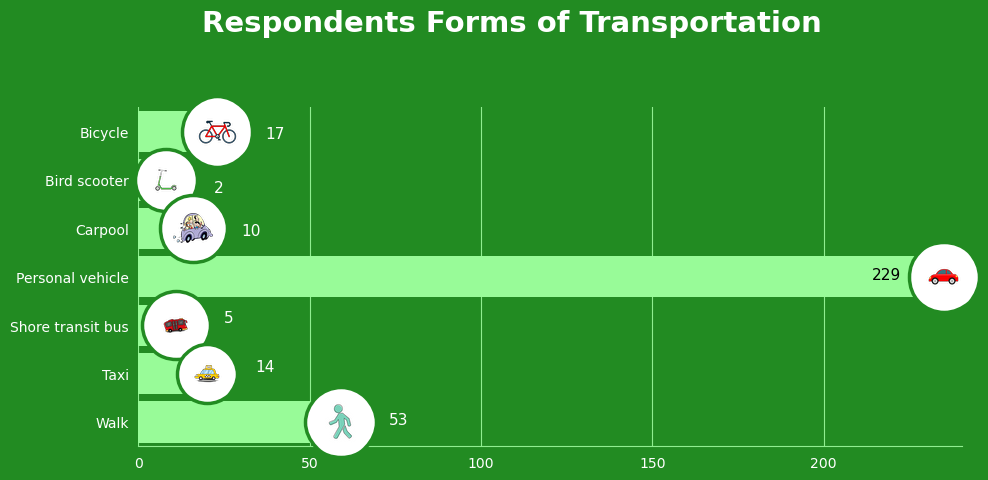

In [13]:
with sns.axes_style({
    "axes.facecolor": "forestgreen",
    "figure.facecolor": "forestgreen",
    "grid.color": "lightgreen",
    "axes.edgecolor": "lightgreen",
    "axes.grid": True,
    "axes.axisbelow": True,
    "axes.labelcolor": "white",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "xtick.bottom": False,
    "xtick.top": False,
    "ytick.left": False,
    "ytick.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
}):

    photos = number_of_transport.replace({'Taxi / Uber / Lyft': 'Taxi', 'Walk / Jog': 'Walk', 'Carpool / Vanpool': 'Carpool'})
    number_of_transport2 = photos.pivot_table(values='selections', columns='Question 4.', aggfunc='first')
    number_of_transport2.index.name = None
    number_of_transport2.reset_index(drop=True, inplace=True)
    row = number_of_transport2.iloc[-1]
    fig = plt.figure(figsize=(10, 5))
    ax = sns.barplot(number_of_transport,
            y=row.index.str.capitalize().values,
            x=row.values,
            orient="h",
            saturation=1,
            color="palegreen",
            width=0.85,
        )

    #Add photo icons
    for index, (name, value) in enumerate(row.items()): 
            icon = plt.imread("./icons/{}.png".format(name.lower()))
            image = OffsetImage(icon, zoom=0.05, interpolation="lanczos", resample=True, visible=True)
            image.image.axes = ax

            ax.add_artist(AnnotationBbox(
                image, (value + 6, index), frameon=True,
                xycoords="data",
                bboxprops={
                    "facecolor": "#fff",
                    "linewidth": 2.5,
                    "edgecolor": "forestgreen",
                    "boxstyle": "circle, pad={}".format(1),
                }
            ))
    
    #Add number labels
    locations = number_of_transport['Question 4.'].tolist()
    selections = number_of_transport['selections'].tolist()
    y = [i * 0.9 for i in range(len(locations))]
    
    PAD = 20
    for count,y_pos in zip(selections,y):
        x = 0
        color = "white"
        path_effects = None
        if count < 60:
            x = count
        if count == 14:
            y_pos += 0.1
        if count == 17:
            y_pos -= 0.2
        if count == 53:
            y_pos += 0.3
        if count == 229:
            x = count - (PAD + 15)
            color = "black"
            
        ax.text(
            x + PAD, y_pos + 0.5 / 2, count, 
            color=color, fontsize=11, va="center",
            path_effects=path_effects
        )
    
    #Add title
    plt.title("Respondents Forms of Transportation ", 
              fontsize=21, 
              weight='bold', 
              y=1.2, 
              x=0.46
        )
    plt.tight_layout()
    plt.show()
    
    #The green is ugly, I'm going with the purple

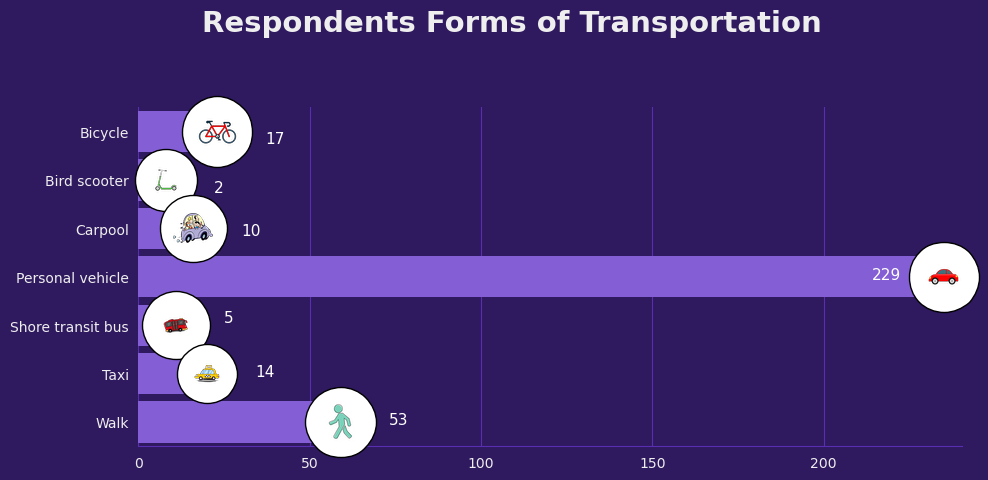

In [14]:
background_color = "#2F195F"
grid_color = "#582FB1"
bar_color = "#835ED4"
text_color = "#eee"

with sns.axes_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,
        "grid.color": grid_color,
        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "xtick.color": text_color,
        "ytick.color": text_color,
        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
}):
   
    photos = number_of_transport.replace({'Taxi / Uber / Lyft': 'Taxi', 'Walk / Jog': 'Walk', 'Carpool / Vanpool': 'Carpool'})
    number_of_transport2 = photos.pivot_table(values='selections', columns='Question 4.', aggfunc='first')
    number_of_transport2.index.name = None
    number_of_transport2.reset_index(drop=True, inplace=True)
    row = number_of_transport2.iloc[-1]
    fig = plt.figure(figsize=(10, 5))
    ax = sns.barplot(number_of_transport,
            y=row.index.str.capitalize().values,
            x=row.values,
            orient="h",
            saturation=1,
            color= bar_color,
            width=0.85,
        )

    for index, (name, value) in enumerate(row.items()): 
            icon = plt.imread("./icons/{}.png".format(name.lower()))
            image = OffsetImage(icon, zoom=0.05, interpolation="lanczos", resample=True, visible=True)
            image.image.axes = ax

            ax.add_artist(AnnotationBbox(
                image, (value + 6, index), frameon=True,
                xycoords="data",
                bboxprops={
                    "facecolor": "#fff",
                    "linewidth": 1.0,
                    "edgecolor": "black",
                    "boxstyle": "circle, pad={}".format(1),
                }
            ))
            
    #Add number labels
    locations = number_of_transport['Question 4.'].tolist()
    selections = number_of_transport['selections'].tolist()
    y = [i * 0.9 for i in range(len(locations))]
    
    PAD = 20
    for count,y_pos in zip(selections,y):
        x = 0
        color = "white"
        path_effects = None
        if count < 60:
            x = count
        if count == 14:
            y_pos += 0.2
        if count == 17:
            y_pos -= 0.1
        if count == 53:
            y_pos += 0.3
        if count == 229:
            x = count - (PAD + 15)
            
        ax.text(
            x + PAD, y_pos + 0.5 / 2, count, 
            color=color, fontsize=11, va="center",
            path_effects=path_effects
        )
            
    plt.title("Respondents Forms of Transportation ", 
              fontsize=21,
              weight='bold', 
              y=1.2, 
              x=0.46
            )
    plt.tight_layout()
    plt.show()

In [15]:
filtered_responses = road[road['5.'] != 'NO INPUT']
walking = filtered_responses['5.'].value_counts()
safe_for_walking = pd.DataFrame(walking)
safe_for_walking.reset_index(inplace=True)
safe_for_walking.columns = ['Question 5.', 'respondents']
safe_for_walking.drop([2], inplace=True)
print("Number of total respondents: " + str(safe_for_walking['respondents'].sum()))
safe_for_walking

Number of total respondents: 231


,Question 5.,respondents
0,"No, I believe safety improvements are needed f...",175
1,"Yes, I believe the roads are safe for walking",56


<Axes: title={'center': 'Do you believe the roads are safe for walking?'}, ylabel='respondents'>

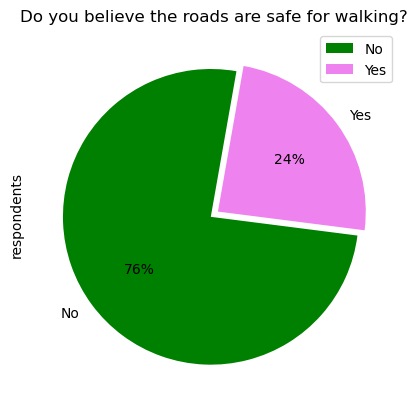

In [16]:
explode = (0.03, 0.03) 
safe_for_walking = safe_for_walking.replace({'No, I believe safety improvements are needed for walking': 'No',
                                          'Yes, I believe the roads are safe for walking': 'Yes'})
safe_for_walking.groupby(['Question 5.']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet'],
                                title='Do you believe the roads are safe for walking?', explode=explode,startangle=80, fontsize=10)

In [17]:
filtered_responses = road[road['6.'] != 'NO INPUT']
biking = filtered_responses['6.'].value_counts()
safe_for_biking = pd.DataFrame(biking)
safe_for_biking.reset_index(inplace=True)
safe_for_biking.columns = ['Question 6.', 'respondents']
safe_for_biking.drop([2], inplace=True)
print("Number of total respondents: " + str(safe_for_biking['respondents'].sum()))
safe_for_biking

Number of total respondents: 211


,Question 6.,respondents
0,"No, I believe safety improvements are needed f...",135
1,"Yes, I believe the roads are safe for biking",76


<Axes: title={'center': 'Do you believe the roads are safe for biking?'}, ylabel='respondents'>

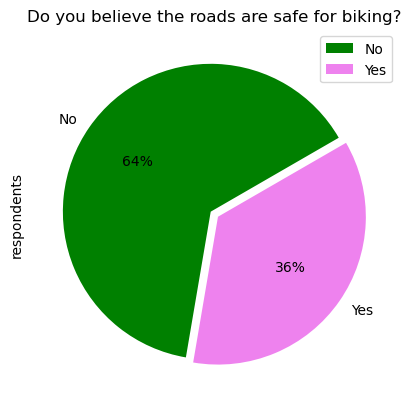

In [18]:
explode = (0.03, 0.03) 
safe_for_biking = safe_for_biking.replace({'No, I believe safety improvements are needed for biking': 'No',
                                          'Yes, I believe the roads are safe for biking': 'Yes'})
safe_for_biking.groupby(['Question 6.']).sum().plot(kind='pie', y='respondents', autopct='%1.0f%%',
                                colors = ['green', 'violet'],
                                title='Do you believe the roads are safe for biking?', explode=explode,startangle=30, fontsize=10)

In [19]:
filtered_responses = road[road['7.'] != 'NO INPUT']
form_of_implmentation = filtered_responses['7.'].value_counts(sort=True)
number_of_implmentation = pd.DataFrame(form_of_implmentation)
number_of_implmentation.reset_index(inplace=True)
number_of_implmentation.columns = ['Question 7.', 'selections']
print("Number of total respondents: " + str(number_of_implmentation['selections'].sum() - 1))
number_of_implmentation['Question 7.'] = number_of_implmentation['Question 7.'].str.split(",")
number_of_implmentation = number_of_implmentation.explode('Question 7.')
number_of_implmentation = number_of_implmentation.groupby(['Question 7.']).sum()
number_of_implmentation.reset_index(inplace=True)
number_of_implmentation.drop([9], inplace=True)
number_of_implmentation.reset_index(drop=True,inplace=True)
number_of_implmentation = number_of_implmentation.sort_values('selections', ascending=False)
number_of_implmentation

Number of total respondents: 224


,Question 7.,selections
5,Sidewalks,177
8,Streetlights,159
1,Crosswalks,136
0,Bike lanes,98
2,Lowering the speed limit,59
7,Speed humps,50
4,Roundabouts,48
6,Speed cameras,48
3,Other: [please list any other road safety ideas],16


In [31]:
number_of_implmentation = number_of_implmentation.replace({'Other: [please list any other road safety ideas]': 'Other'})
graph_for_implementation = Barh(data=number_of_implmentation,
                                values="selections",
                                labels="Question 7.",
                                title="Number of Road Implementation Selections",
                                title_fontsize=3)
graph_for_implementation.set_xlabel("Selections", fontsize=2)

graph_for_implementation.show()

In [21]:
filtered_responses = road[road['8.'] != 'NO INPUT']
bus_stops = filtered_responses['8.'].value_counts(sort=True)
location_of_bus_stops = pd.DataFrame(bus_stops)
location_of_bus_stops.reset_index(inplace=True)
location_of_bus_stops.columns = ['Question 8.', 'selections']
print("Number of total respondents: " + str(location_of_bus_stops['selections'].sum() - 1))
location_of_bus_stops['Question 8.'] = location_of_bus_stops['Question 8.'].str.split(",")
location_of_bus_stops = location_of_bus_stops.explode('Question 8.')
location_of_bus_stops = location_of_bus_stops.groupby(['Question 8.']).sum()
location_of_bus_stops.reset_index(inplace=True)
location_of_bus_stops.drop([8], inplace=True)
location_of_bus_stops.reset_index(drop=True,inplace=True)
location_of_bus_stops = location_of_bus_stops.sort_values('selections', ascending=False)
location_of_bus_stops

Number of total respondents: 199


,Question 8.,selections
0,Cypress Road (Sav A Lot parking lot),106
3,Isabella Street (Habitat for Humanity),102
5,Lake Street (Village of Hope and Homes on John...,92
4,Lake Street (Lake Street Park),84
1,Gateway Street (Gateway Village),70
7,West Road (Westbrook Commons and Coty Cox),69
2,I don’t think any bus stops are needed,24
6,Other Locations? [please list any additional l...,14


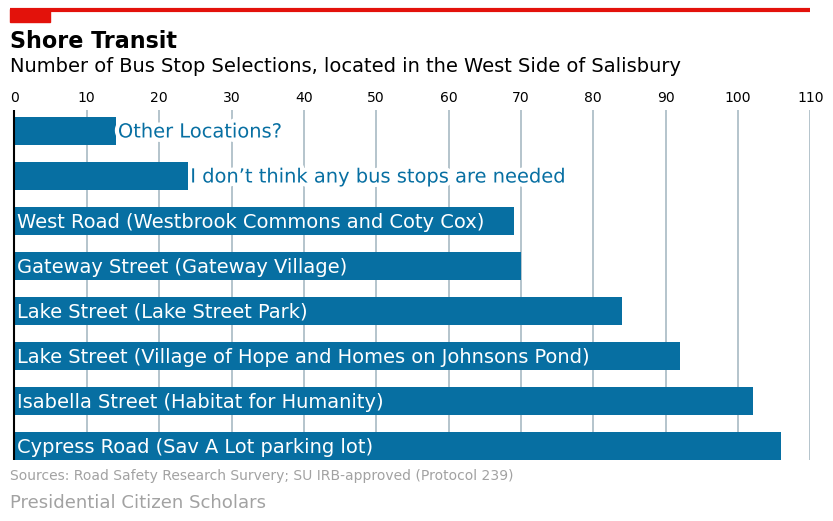

In [22]:
location_of_bus_stops = location_of_bus_stops.replace({'Other Locations? [please list any additional locations]': 'Other Locations?'})
locations = location_of_bus_stops['Question 8.'].tolist()
selections = location_of_bus_stops['selections'].tolist()
y = [i * 0.9 for i in range(len(locations))]

# The colors
BLUE = "#076fa2"
RED = "#E3120B"
BLACK = "#202020"
GREY = "#a2a2a2"

fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(y,selections, height=0.55, align="edge", color=BLUE);

ax.xaxis.set_ticks([i * 10 for i in range(0, 15)])
ax.xaxis.set_ticklabels([i * 10 for i in range(0,15)], size=10, fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)

ax.set_xlim((0, 110))
ax.set_ylim((0, len(locations) * 0.9 - 0.2))

ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.yaxis.set_visible(False)

PAD = 0.3
for name, count, y_pos in zip(locations,selections, y):
    x = 0
    color = "white"
    path_effects = None
    if count < 30:
        x = count
        color = BLUE    
        path_effects=[withStroke(linewidth=6, foreground="white")]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color=color, fontsize=14, va="center",
        path_effects=path_effects
    ) 
    
fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

fig.text(
    0, 0.925, "Shore Transit", 
    fontsize=16, fontweight="bold"
)
# Add subtitle
fig.text(
    0, 0.875, "Number of Bus Stop Selections, located in the West Side of Salisbury", 
    fontsize=14
)

# Add caption
source = "Sources: Road Safety Research Survery; SU IRB-approved (Protocol 239)"
fig.text(
    0, 0.06, source, color=GREY, 
    fontsize=10
)

# Add authorship
fig.text(
    0, 0.005, "Presidential Citizen Scholars", color=GREY,
    fontsize=13
)

# Add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

# Set facecolor, useful when saving as .png
fig.set_facecolor("white")

In [23]:
def count_words_in_column(column, selected_words):
    word_counts = {}
    for word in selected_words:
        word_counts[word] = column.str.lower().str.count(word.lower()).sum()
    return word_counts

qualitative_data = road[['5b.', '6b.', '7._12_TEXT', '8._11_TEXT', '9.']]
qualitative_data = qualitative_data.drop([0])
qualitative_data.reset_index(drop=True,inplace=True)
selected_words = ['sidewalks', 'side walks',
                  'bike lanes', 
                  'streetlights', 'street lights', 
                  'crosswalks', 'cross walks']
total_word_counts = {}
for column in qualitative_data.columns:
    column_counts = count_words_in_column(qualitative_data[column], selected_words)
    for word, count in column_counts.items():
        total_word_counts[word] = total_word_counts.get(word, 0) + count
    
total_word_counts
total_number_mentions = pd.DataFrame([total_word_counts])
total_number_mentions['sidewalks'] = total_number_mentions['sidewalks'] + total_number_mentions['side walks']
total_number_mentions['streetlights'] = total_number_mentions['streetlights'] + total_number_mentions['street lights']
total_number_mentions['crosswalks'] = total_number_mentions['crosswalks'] + total_number_mentions['cross walks']
total_number_mentions = total_number_mentions.drop(['side walks', 'street lights', 'cross walks'], axis=1)
total_number_mentions.reset_index(drop=True,inplace=True)
total_number_mentions

,sidewalks,bike lanes,streetlights,crosswalks
0,54,30,4,15


In [24]:
import time
def animated_counter(word_name, word_count):
    for word_count in range(word_count + 1):
        word_bolded = "\033[1m" + word_name + "\033[0m"
        output = f'The number of times {word_bolded} was mentioned is {word_count}'
        print(f'\r{output}', end='', flush=True)  # Ensure the output is immediately flushed to the console
        time.sleep(0.04) #Adjusted sleep duration

    print()  # Move to the next line after the animation completes

for word_name in total_number_mentions.columns:
    word_count = total_number_mentions.loc[0, word_name]
    animated_counter(word_name, word_count)

The number of times sidewalks was mentioned is 54
The number of times bike lanes was mentioned is 30
The number of times streetlights was mentioned is 4
The number of times crosswalks was mentioned is 15
